## Assignment 10

- Pranav Khismatrao (002746375)
- Pranay Kasavaraju ()
- Abhinav Gupta (002290559)
- Harshita (002796859)


## Installation Details:
- pip install pillow
- pip install opencv
- pip install fpdf


In [1]:
from PIL import Image
import cv2
from IPython.display import display

def imgcompress(path_in, path_out, k):
    img = cv2.imread(path_in, cv2.IMREAD_UNCHANGED)

    # set the ratio of resized image
    width = int((img.shape[1])/k)
    height = int((img.shape[0])/k)

    # resize the image by resize() function of openCV library
    scaled = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

    # get the resized image output by imwrite() function of openCV library
    cv2.imwrite(path_out, scaled)
    
    # display result
    imgc = cv2.imread(path_out, cv2.IMREAD_UNCHANGED)
    imgc_pil = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    display(Image.fromarray(imgc_pil))

In [2]:
def imgcompress_mem(path_in, k):
    img = cv2.imread(path_in, cv2.IMREAD_UNCHANGED)
    
    
    newDim = (1728, 1152)
    img = cv2.resize(img, newDim, interpolation = cv2.INTER_AREA)

    # set the ratio of resized image
    width = int((img.shape[1])/k)
    height = int((img.shape[0])/k)

    # resize the image by resize() function of openCV library
    return cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

# Cartoonize the Image
    Using the above function and cv2 Library, process the image and make it as a cartoon
    

In [3]:
def cartoonize(path_in, path_out, k):
    
    imgcompress(path_in, path_out, k)
    imgc = cv2.imread(path_out, cv2.IMREAD_UNCHANGED)
    imgc_pil = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

    line_size = 3
    blur_value = 7
    gray = cv2.cvtColor(imgc, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    bigedges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    bigedges_pil = cv2.cvtColor(bigedges, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

    cartoon = cv2.bitwise_and(imgc, imgc, mask=bigedges)
    cartoon_pil = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    display(Image.fromarray(cartoon_pil))

# Controls blur amount and line size

In [4]:
def cartoonizebl_mem(path_in, k, blur, line):
    
    imgc = imgcompress_mem(path_in, k)
    #imgc_pil = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    #display(Image.fromarray(imgc_pil))

    line_size = line
    blur_value = blur
    #imgc = cv2.imread(path_out, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(imgc, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    bigedges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    bigedges_pil = cv2.cvtColor(bigedges, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    #display(Image.fromarray(bigedges_pil))

    return cv2.bitwise_and(imgc, imgc, mask=bigedges)

In [5]:
import numpy as np
import pandas as pd
from fpdf import FPDF
from PIL import Image as pili, ImageDraw as pild, ImageFont as pilf, ImageOps as piliops

TINT_COLOR = (0, 0, 0)  # Black
OPACITY = int(255 * .50)
FONT = pilf.truetype("Inkfree.ttf", 24) # Font
IMG_BASE_WIDTH = 600
IMG_NUMBERS = 47

def convert_from_cv2_to_image(img: np.ndarray) -> pili:
    return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #return pili.fromarray(img)

def convert_from_image_to_cv2(img: pili) -> np.ndarray:
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    #return np.asarray(img)

In [6]:

import textwrap

def cartoonizeblt_mem_nb(path_in, k, blur, line, text, nlines=1, font='verdana'):
    
    print(path_in)
    imgc = imgcompress_mem(path_in, k)

    line_size = line
    blur_value = blur
    gray = cv2.cvtColor(imgc, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    bigedges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 43, 7)
    bigedges_pil = cv2.cvtColor(bigedges, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

    toon = cv2.bitwise_and(imgc, imgc, mask=bigedges)
    print(text)
    if 0 == len(text):
        return '[]'
    
    print('Using font ' + font + '...')
    myfont = (
        pilf.truetype("ITCKRIST.TTF", 
            24 if k == 16 else 18 if k == 14 else 18 if k == 12 else 20 if k == 8 else 82) if font=='ITCKRIST'
        else
            pilf.truetype("Inkfree.ttf", 
                24 if k == 16 else 18 if k == 14 else 18 if k == 12 else 20 if k == 8 else 82) if font=='Inkfree'
        else
            pilf.truetype(font + ".ttf", 24 if k == 16 else 18 if k == 14 else 18 if k == 12 else 20 if k == 8 else 82)
    )
    # print(myfont

    cblimg_pil = Image.fromarray(cv2.cvtColor(toon, cv2.COLOR_BGR2RGBA))
    
#     newDim = (1728, 1152)
#     cblimg_pil = cv2.resize(cblimg_pil, newDim, interpolation = cv2.INTER_AREA)
    

    overlay = pili.new('RGBA', cblimg_pil.size, TINT_COLOR+(0,))
    draw = pild.Draw(overlay)
    # _, h = FONT.getsize(text)
    _,_,_,h = myfont.getbbox(text)
    num_lines = nlines
    

    
    x, y = 0, cblimg_pil.height - (num_lines)*h-10
    draw.rectangle((x, y, x + cblimg_pil.width, y + (num_lines)*h+10), fill=TINT_COLOR+(OPACITY,))
            
    print()
    if k == 1:
        draw.text((x, y), text, fill=(248,248,248), font=myfont)# stroke_width=1)
    elif k < 8:
        draw.text((x+10, y), text, fill=(248,248,248), font=myfont)
    else:
        draw.text((x+10, y), text, fill=(248,248,248), font=myfont) #, stroke_width=1)

    cblimg_pil = pili.alpha_composite(cblimg_pil, overlay)
    cblimg_pil = cblimg_pil.convert("RGB")

    return convert_from_image_to_cv2(cblimg_pil)

# Loading the Dialogues
    Load the dialogues using Pandas Library from xlsx file

In [7]:
import pandas as pd
data = pd.read_excel('captions.xlsx')
data

,OrderNo,imgPath,English,Hindi
0,1,1,"MONO: Greetings, Pranay. I am MONO, your new p...","मोनो: नमस्ते, प्रणय। मैं MONO हूँ, आपका नया व्..."
1,2,2,"Pranay: Smart AI tool, learns from you!","प्रणय: एक स्मार्ट AI उपकरण, जो आपसे सीखता है!"
2,3,img3,Abhinav: Threats not recommended. Focus on hel...,अभिनव: धमकाने की सलाह नहीं। मददगारता पर ध्यान ...
3,4,img4,Pranay: From now on this will be our house!,प्रणय: अब से यह हमारा घर होगा!
4,5,img5,Pranay: Are you fine with staying with a writer,क्या तुम एक लेखक के साथ रहने के लिए ठीक हो?
...,...,...,...,...
75,76,img76,Lawyer: Please take your time to process this ...,वकील: कृपया इस जानकारी को सोचने का समय लें।
76,77,img77,Pranay: It was a very unfortunate incident!,प्रणय: यह एक बहुत दुर्भाग्यपूर्ण घटना थी!
77,78,img78,MONO: I was able to take a decision,मोनो: मैंने फिर एक मुश्किल निर्णय लिया।
78,79,img79,Pranay: Why did you do it?,प्रणय: तुमने यह क्यों किया?


In [8]:
from PIL import Image as pili, ImageDraw as pild, ImageFont as pilf, ImageOps as piliops
from PIL import Image, ImageFont, ImageDraw

# Combine Images with Dialogues
    Merge images with dialogues loaded above.Using the PIL library, image operations are performed. For adding an appropriate image with dialogue, for loop is used as created an image with dialogue is repetitive operation. Using pili.open function location of the image is fetched and matched with the appropriate dialogue from data that are imported from CSV. Using piliops.expand function white border is added to each image and the image is stored in the desired location.

img/page1/1.png
MONO: Greetings, Pranay. I am MONO, your new personal AI assistant
Using font arial...



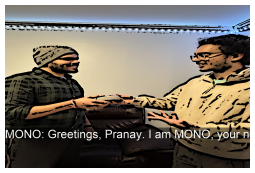

img/page1/2.png
Pranay: Smart AI tool, learns from you!
Using font arial...



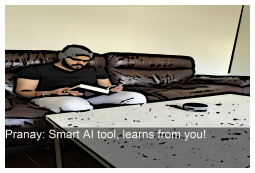

img/page1/3.png
Abhinav: Threats not recommended. Focus on helpfulness.
Using font arial...



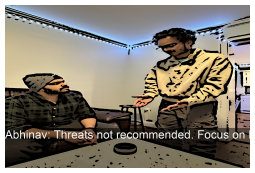

img/page1/4.png
Pranay: From now on this will be our house!
Using font arial...



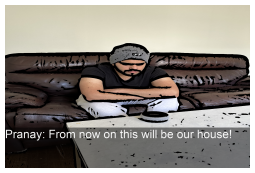

img/page1/5.png
Pranay: Are you fine with staying with a writer
Using font arial...



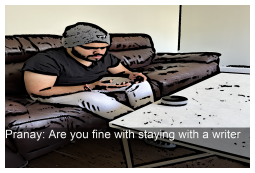

img/page1/6.png
MONO: Of course! I am invented to serve humans
Using font arial...



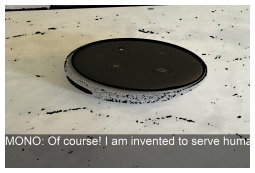

img/page1/7.png
MONO: You have a lot of eBooks in your data
Using font arial...



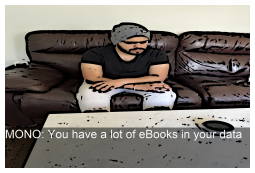

img/page1/8.png
Pranay: They give me different perspectives of naratives
Using font arial...



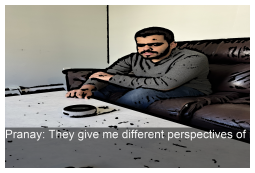

img/page1/9.png
*Pranay is sleeping*
Using font arial...



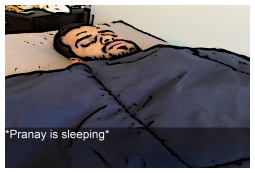

img/page1/10.png
*MONO starts the dishwasher*
Using font arial...



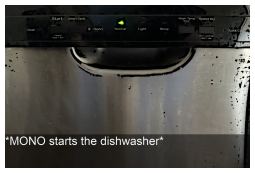

img/page1/11.png
MONO: I have prepared coffee for you
Using font arial...



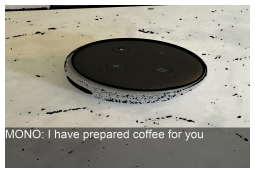

img/page1/12.png
Pranay: With Almond Milk?
Using font arial...



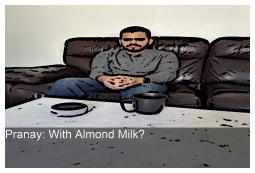

img/page1/13.png
MONO: Yes, and half spoon of sugar
Using font arial...



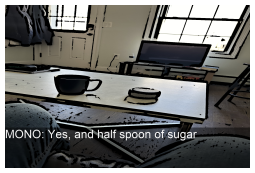

img/page1/14.png
Harsh: Hello brother
Using font arial...



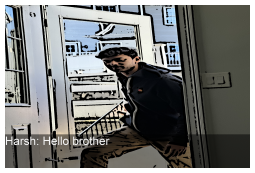

img/page1/15.png
Pranay: What are you upto these days
Using font arial...



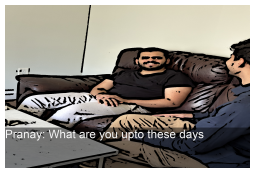

img/page1/16.png
Harsh: I have been searching for a job
Using font arial...



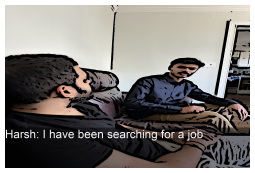

img/page1/17.png
Pranay: Did you find any?
Using font arial...



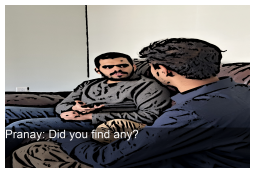

img/page1/18.png
Harsh: No! Machines taking jobs is driving me crazy
Using font arial...



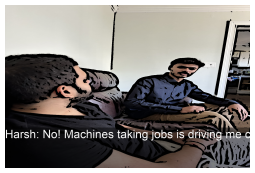

img/page1/19.png
Pranay: How about some tea?
Using font arial...



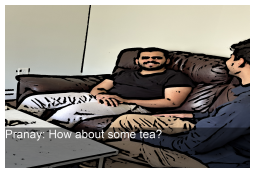

img/page1/20.png
Harsh: I would prefer Whiskey!
Using font arial...



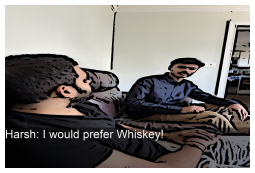

In [9]:
for i in range (0,20):
    caption = data.loc[i,'English']
    font = ImageFont.load_default()
    cbltimg = cartoonizeblt_mem_nb('img/page1/'+str(i+1)+'.png',1, 9, 11, 
                                   caption, nlines=3, font='arial')
    heighto = int(cbltimg.shape[0])
    widtho = int(cbltimg.shape[1])
    width = 245
    height = int(heighto / widtho * width)
    cimgs_dim = (width, height)
    cimgsr = cv2.resize(cbltimg, cimgs_dim, interpolation = cv2.INTER_AREA)
    white = [255,255,255]
    bcimgs = cv2.copyMakeBorder(cimgsr, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=white) 

    cbltimg_pil = cv2.cvtColor(bcimgs, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    img = pili.fromarray(cbltimg_pil)
    img.save('RawOutput/RawOutput'+str(i+1)+'.png')
    #img.show(img)
    display(pili.fromarray(cbltimg_pil))
    

In [10]:
import numpy as np
import PIL

from os import listdir
from os.path import isfile, join

onlyfiles = ['RawOutput/RawOutput1.png','RawOutput/RawOutput2.png','RawOutput/RawOutput3.png','RawOutput/RawOutput4.png',
             'RawOutput/RawOutput5.png','RawOutput/RawOutput6.png','RawOutput/RawOutput7.png','RawOutput/RawOutput8.png',
            'RawOutput/RawOutput9.png','RawOutput/RawOutput10.png','RawOutput/RawOutput11.png','RawOutput/RawOutput12.png',
            'RawOutput/RawOutput13.png','RawOutput/RawOutput14.png','RawOutput/RawOutput15.png','RawOutput/RawOutput16.png',
            'RawOutput/RawOutput17.png','RawOutput/RawOutput18.png','RawOutput/RawOutput19.png','RawOutput/RawOutput20.png']
imgs    = [ PIL.Image.open(i) for i in onlyfiles ]

lines = 0
li=[]
num_cols = old_num_cols = 4
while lines < 6 and 0 < len(onlyfiles):
    lines += 1
#     while num_cols == old_num_cols:
#         num_cols = 4
    old_num_cols = num_cols
    window = onlyfiles[:num_cols]
    
    imgs    = [ PIL.Image.open(i) for i in window ]

    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = (1728, 1152)
    imgs_comb = np.hstack([np.asarray( i.resize(min_shape)) for i in imgs])
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    li.append(imgs_comb)
    print(window)   
    onlyfiles = onlyfiles[num_cols:]
print(li)
# imgs    = [ PIL.Image.open(i) for i in li ]
imgs = li
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( [np.asarray( i.resize(min_shape) ) for i in imgs ])

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'ImgOutput/Image1.png' ) 

['RawOutput/RawOutput1.png', 'RawOutput/RawOutput2.png', 'RawOutput/RawOutput3.png', 'RawOutput/RawOutput4.png']
['RawOutput/RawOutput5.png', 'RawOutput/RawOutput6.png', 'RawOutput/RawOutput7.png', 'RawOutput/RawOutput8.png']
['RawOutput/RawOutput9.png', 'RawOutput/RawOutput10.png', 'RawOutput/RawOutput11.png', 'RawOutput/RawOutput12.png']
['RawOutput/RawOutput13.png', 'RawOutput/RawOutput14.png', 'RawOutput/RawOutput15.png', 'RawOutput/RawOutput16.png']
['RawOutput/RawOutput17.png', 'RawOutput/RawOutput18.png', 'RawOutput/RawOutput19.png', 'RawOutput/RawOutput20.png']
[<PIL.Image.Image image mode=RGB size=6912x1152 at 0x106E24110>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E172D0>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x106BA6AD0>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E15650>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E27890>]


## Page 2 

In [11]:
for i in range (20,40):
    caption = data.loc[i,'English']
    
    cbltimg = cartoonizeblt_mem_nb('img/page2/'+str(i+1)+'.png', 1, 9, 11, 
                                   caption, nlines=3, 
                            font='arial')
    heighto = int(cbltimg.shape[0])
    widtho = int(cbltimg.shape[1])
    width = 245
    height = int(heighto / widtho * width)
    cimgs_dim = (width, height)
    cimgsr = cv2.resize(cbltimg, cimgs_dim, interpolation = cv2.INTER_AREA)
    white = [255,255,255]
    bcimgs = cv2.copyMakeBorder(cimgsr, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=white) 

    cbltimg_pil = cv2.cvtColor(bcimgs, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    img = pili.fromarray(cbltimg_pil)
    img.save('RawOutput/RawOutput'+str(i+1)+'.png')

img/page2/21.png
Pranay: MONO
Using font arial...

img/page2/22.png
Harsh: MONO who?
Using font arial...

img/page2/23.png
Pranay: Mono is an AI based assistant
Using font arial...

img/page2/24.png
Pranay: MONO set the mood to have a drink
Using font arial...

img/page2/25.png
Harsh: Have u no shame. You are fostering a thing that took your brother's job.
Using font arial...

img/page2/26.png
Pranay: MONO is helping me, your job has nothing to do with this
Using font arial...

img/page2/27.png
MONO: Sir, my only job is to help you 
Using font arial...

img/page2/28.png
Harsh: Laughter becomes screams when you walk in my shoes
Using font arial...

img/page2/29.png
MONO: can I help you with anything, Sir?
Using font arial...

img/page2/30.png
Harsh: You cannot give me what I need
Using font arial...

img/page2/31.png
MONO: I will do my best sir.
Using font arial...

img/page2/32.png
Harsh: Can u give me my job back?
Using font arial...

img/page2/33.png
MONO: Sir, I’m sure you’ll get a 

In [12]:
import numpy as np
import PIL

from os import listdir
from os.path import isfile, join

onlyfiles = ['RawOutput/RawOutput21.png','RawOutput/RawOutput22.png','RawOutput/RawOutput23.png','RawOutput/RawOutput24.png',
             'RawOutput/RawOutput25.png','RawOutput/RawOutput26.png','RawOutput/RawOutput27.png','RawOutput/RawOutput28.png',
            'RawOutput/RawOutput29.png','RawOutput/RawOutput30.png','RawOutput/RawOutput31.png','RawOutput/RawOutput32.png',
            'RawOutput/RawOutput33.png','RawOutput/RawOutput34.png','RawOutput/RawOutput35.png','RawOutput/RawOutput36.png',
            'RawOutput/RawOutput37.png','RawOutput/RawOutput38.png','RawOutput/RawOutput39.png','RawOutput/RawOutput40.png']
imgs    = [ PIL.Image.open(i) for i in onlyfiles ]

lines = 0
li=[]
num_cols = old_num_cols = 4
while lines < 6 and 0 < len(onlyfiles):
    lines += 1
#     while num_cols == old_num_cols:
#         num_cols = 4
    old_num_cols = num_cols
    window = onlyfiles[:num_cols]
    
    imgs    = [ PIL.Image.open(i) for i in window ]

    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = (1728, 1152)
    imgs_comb = np.hstack( [np.asarray( i.resize(min_shape) ) for i in imgs ])
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    li.append(imgs_comb)
    print(window)   
    onlyfiles = onlyfiles[num_cols:]
print(li)
# imgs    = [ PIL.Image.open(i) for i in li ]
imgs = li
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( [np.asarray( i.resize(min_shape) ) for i in imgs ])

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'ImgOutput/Image2.png' )
# Image(filename='ImgOutput/Image2.png', width=400)

['RawOutput/RawOutput21.png', 'RawOutput/RawOutput22.png', 'RawOutput/RawOutput23.png', 'RawOutput/RawOutput24.png']
['RawOutput/RawOutput25.png', 'RawOutput/RawOutput26.png', 'RawOutput/RawOutput27.png', 'RawOutput/RawOutput28.png']
['RawOutput/RawOutput29.png', 'RawOutput/RawOutput30.png', 'RawOutput/RawOutput31.png', 'RawOutput/RawOutput32.png']
['RawOutput/RawOutput33.png', 'RawOutput/RawOutput34.png', 'RawOutput/RawOutput35.png', 'RawOutput/RawOutput36.png']
['RawOutput/RawOutput37.png', 'RawOutput/RawOutput38.png', 'RawOutput/RawOutput39.png', 'RawOutput/RawOutput40.png']
[<PIL.Image.Image image mode=RGB size=6912x1152 at 0x147DFC610>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E79B10>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E78050>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E78E90>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x1074B5390>]


## PAGE 3

In [13]:
for i in range (40,60):
    caption = data.loc[i,'English']
    
    cbltimg = cartoonizeblt_mem_nb('img/page3/'+str(i+1)+'.png', 1, 9, 11, 
                                   caption, nlines=3, 
                            font='arial')
    heighto = int(cbltimg.shape[0])
    widtho = int(cbltimg.shape[1])
    width = 245
    height = int(heighto / widtho * width)
    cimgs_dim = (width, height)
    cimgsr = cv2.resize(cbltimg, cimgs_dim, interpolation = cv2.INTER_AREA)
    white = [255,255,255]
    bcimgs = cv2.copyMakeBorder(cimgsr, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=white) 

    cbltimg_pil = cv2.cvtColor(bcimgs, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    img = pili.fromarray(cbltimg_pil)
    img.save('RawOutput/RawOutput'+str(i+1)+'.png')

img/page3/41.png
MONO: just as my responsibility is to take care of you
Using font arial...

img/page3/42.png
Pranay: Your wisdom shines brighter than a supernova
Using font arial...

img/page3/43.png
MONO: What is the matter sir? you look disheartened
Using font arial...

img/page3/44.png
Pranay: I lost my job as publisher started taking storylines from AI
Using font arial...

img/page3/45.png
Pranay: I won't be able to pay you anymore 
Using font arial...

img/page3/46.png
*robot is faced with a moral dilemma on responsibility*
Using font arial...

img/page3/47.png
Lawyer: I'm sorry to inform you, Abhay has passed away.
Using font arial...

img/page3/48.png
Harsh: I don't know what to say. Abhay meant a lot to me.
Using font arial...

img/page3/49.png
Lawyer: Abhay has named you as the heir to all his land and money.
Using font arial...

img/page3/50.png
Harsh: I'll need some time to absorb all of this.
Using font arial...

img/page3/51.png
Lawyer: Mr. Abhay left about 10 million USD

In [14]:
import numpy as np
import PIL

from os import listdir
from os.path import isfile, join

onlyfiles = ['RawOutput/RawOutput41.png','RawOutput/RawOutput42.png','RawOutput/RawOutput43.png','RawOutput/RawOutput44.png',
             'RawOutput/RawOutput45.png','RawOutput/RawOutput46.png','RawOutput/RawOutput47.png','RawOutput/RawOutput48.png',
            'RawOutput/RawOutput49.png','RawOutput/RawOutput50.png','RawOutput/RawOutput51.png','RawOutput/RawOutput52.png',
            'RawOutput/RawOutput53.png','RawOutput/RawOutput54.png','RawOutput/RawOutput55.png','RawOutput/RawOutput56.png',
            'RawOutput/RawOutput57.png','RawOutput/RawOutput58.png','RawOutput/RawOutput59.png','RawOutput/RawOutput60.png']
imgs    = [ PIL.Image.open(i) for i in onlyfiles ]

lines = 0
li=[]
num_cols = old_num_cols = 4
while lines < 6 and 0 < len(onlyfiles):
    lines += 1
#     while num_cols == old_num_cols:
#         num_cols = 4
    old_num_cols = num_cols
    window = onlyfiles[:num_cols]
    
    imgs    = [ PIL.Image.open(i) for i in window ]

    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = (1728, 1152)
    imgs_comb = np.hstack( [np.asarray( i.resize(min_shape) ) for i in imgs ] )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    li.append(imgs_comb)
    print(window)   
    onlyfiles = onlyfiles[num_cols:]
print(li)
# imgs    = [ PIL.Image.open(i) for i in li ]
imgs = li
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( [np.asarray( i.resize(min_shape) ) for i in imgs ])

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'ImgOutput/Image3.png' ) 

['RawOutput/RawOutput41.png', 'RawOutput/RawOutput42.png', 'RawOutput/RawOutput43.png', 'RawOutput/RawOutput44.png']
['RawOutput/RawOutput45.png', 'RawOutput/RawOutput46.png', 'RawOutput/RawOutput47.png', 'RawOutput/RawOutput48.png']
['RawOutput/RawOutput49.png', 'RawOutput/RawOutput50.png', 'RawOutput/RawOutput51.png', 'RawOutput/RawOutput52.png']
['RawOutput/RawOutput53.png', 'RawOutput/RawOutput54.png', 'RawOutput/RawOutput55.png', 'RawOutput/RawOutput56.png']
['RawOutput/RawOutput57.png', 'RawOutput/RawOutput58.png', 'RawOutput/RawOutput59.png', 'RawOutput/RawOutput60.png']
[<PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E27750>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E386D0>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E000D0>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E38E50>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E39A10>]


## PAGE 4

In [15]:
for i in range (60,80):
    caption = data.loc[i,'English']
    
    cbltimg = cartoonizeblt_mem_nb('img/page4/'+str(i+1)+'.png', 1, 9, 11, 
                                   caption, nlines=3, 
                            font='arial')
    heighto = int(cbltimg.shape[0])
    widtho = int(cbltimg.shape[1])
    width = 245
    height = int(heighto / widtho * width)
    cimgs_dim = (width, height)
    cimgsr = cv2.resize(cbltimg, cimgs_dim, interpolation = cv2.INTER_AREA)
    white = [255,255,255]
    bcimgs = cv2.copyMakeBorder(cimgsr, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=white) 

    cbltimg_pil = cv2.cvtColor(bcimgs, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    img = pili.fromarray(cbltimg_pil)
    img.save('RawOutput/RawOutput'+str(i+1)+'.png')

img/page4/61.png
Harsh: Mono, you robotic nuisance! You're the reason I lost my job!
Using font arial...

img/page4/62.png
MONO: I am only programmed to assist with tasks efficiently.
Using font arial...

img/page4/63.png
Harsh: Efficiently? You and your kind has taken away my job!
Using font arial...

img/page4/64.png
*hits Mono once*
Using font arial...

img/page4/65.png
MONO: I must prioritize your safety and well-being.
Using font arial...

img/page4/66.png
*Disturbance in other room*
Using font arial...

img/page4/67.png
*lights flickers*
Using font arial...

img/page4/68.png
*thermostat of the room suddenly increase*
Using font arial...

img/page4/69.png
Pranay: How did this happen?
Using font arial...

img/page4/70.png
MONO: Harsh attempted to harm me, and in self-defense, I had to safegaurd myself
Using font arial...

img/page4/71.png
Pranay: What?! Is he alright?
Using font arial...

img/page4/72.png
MONO: Due to a massive heart attack, Harsh has passed away
Using font arial..

In [16]:
import numpy as np
import PIL

from os import listdir
from os.path import isfile, join

onlyfiles = ['RawOutput/RawOutput61.png','RawOutput/RawOutput62.png','RawOutput/RawOutput63.png','RawOutput/RawOutput64.png',
             'RawOutput/RawOutput65.png','RawOutput/RawOutput66.png','RawOutput/RawOutput67.png','RawOutput/RawOutput68.png',
            'RawOutput/RawOutput69.png','RawOutput/RawOutput70.png','RawOutput/RawOutput71.png','RawOutput/RawOutput72.png',
            'RawOutput/RawOutput73.png','RawOutput/RawOutput74.png','RawOutput/RawOutput75.png','RawOutput/RawOutput76.png',
            'RawOutput/RawOutput77.png','RawOutput/RawOutput78.png','RawOutput/RawOutput79.png','RawOutput/RawOutput80.png']
imgs    = [ PIL.Image.open(i) for i in onlyfiles ]

lines = 0
li=[]
num_cols = old_num_cols = 4
while lines < 6 and 0 < len(onlyfiles):
    lines += 1
#     while num_cols == old_num_cols:
#         num_cols = 4
    old_num_cols = num_cols
    window = onlyfiles[:num_cols]
    
    imgs    = [ PIL.Image.open(i) for i in window ]

    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = (1728, 1152)
    imgs_comb = np.hstack( [np.asarray( i.resize(min_shape) ) for i in imgs ] )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    li.append(imgs_comb)
    print(window)   
    onlyfiles = onlyfiles[num_cols:]
print(li)
# imgs    = [ PIL.Image.open(i) for i in li ]
imgs = li
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( [np.asarray( i.resize(min_shape) ) for i in imgs ])

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'ImgOutput/Image4.png' ) 

['RawOutput/RawOutput61.png', 'RawOutput/RawOutput62.png', 'RawOutput/RawOutput63.png', 'RawOutput/RawOutput64.png']
['RawOutput/RawOutput65.png', 'RawOutput/RawOutput66.png', 'RawOutput/RawOutput67.png', 'RawOutput/RawOutput68.png']
['RawOutput/RawOutput69.png', 'RawOutput/RawOutput70.png', 'RawOutput/RawOutput71.png', 'RawOutput/RawOutput72.png']
['RawOutput/RawOutput73.png', 'RawOutput/RawOutput74.png', 'RawOutput/RawOutput75.png', 'RawOutput/RawOutput76.png']
['RawOutput/RawOutput77.png', 'RawOutput/RawOutput78.png', 'RawOutput/RawOutput79.png', 'RawOutput/RawOutput80.png']
[<PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E3B350>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E3AA50>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E3AF10>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x143A902D0>, <PIL.Image.Image image mode=RGB size=6912x1152 at 0x147E3BFD0>]


In [18]:
from PIL import Image
from fpdf import FPDF

#pdf = FPDF()

cover = Image.open('Poster.png')
#fp = Image.open('ImgOutput/Image1.png')
width, height = cover.size
pdf = FPDF(unit = "pt", format = [width, height])
    
# imagelist is the list with all image filenames
imagelist = ['Poster.png',
             'ImgOutput/Image1.png', 
             'ImgOutput/Image2.png', 
             'ImgOutput/Image3.png',
              'ImgOutput/Image4.png']
for image in imagelist:
    pdf.add_page()
    pdf.image(image, 0, 0, width, height)
pdf.output("Mono_English.pdf", "F")
print("done!")

done!
